<h1 style="text-align:center;font-size:50px;">Ensemble Learning</h1>

# Imports 👇

In [55]:
import pandas
import numpy
from sklearn import svm
from sklearn.ensemble import BaggingClassifier
import xgboost
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix,classification_report
import seaborn
import matplotlib.pyplot as pyplot

##### 👇 setting the matplotlib configurations

In [254]:
%matplotlib inline
pyplot.rcParams["figure.figsize"] = (8, 5)

# Data Reading 👇

In [191]:
# this are the output classes, only two classes are there paitient will dead or alive
classes_list=['Not_Failed','Failed']

In [192]:
data=pandas.read_csv('./Brain_failure_healthcare-dataset-stroke-data.csv')

### 👇 cheking the columns, data, data type information, correlation between attributes

In [193]:
data.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [194]:
data['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

In [195]:
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [196]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [197]:
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [198]:
data.corr()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
id,1.000000,0.003538,0.003550,-0.001296,0.001092,0.003084,0.006388
age,0.003538,1.000000,0.276398,0.263796,0.238171,0.333398,0.245257
hypertension,0.003550,0.276398,1.000000,0.108306,0.174474,0.167811,0.127904
heart_disease,-0.001296,0.263796,0.108306,1.000000,0.161857,0.041357,0.134914
avg_glucose_level,0.001092,0.238171,0.174474,0.161857,1.000000,0.175502,0.131945
bmi,0.003084,0.333398,0.167811,0.041357,0.175502,1.000000,0.042374
stroke,0.006388,0.245257,0.127904,0.134914,0.131945,0.042374,1.000000


# Dimentiality reduction

In [199]:
data=data.drop(['id','bmi'],axis=1)

# data Cleaning

In [200]:
data=data.replace("Male",1)
data=data.replace("Female",0)
data=data.replace("Other",0)


data=data.drop(['ever_married','work_type','Residence_type'],axis=1)

data=data.replace("never smoked",0)
data=data.replace("Unknown",0)
data=data.replace("formerly smoked",1)
data=data.replace("smokes",1)

# Data Visualization 👇

In [201]:
data

,gender,age,hypertension,heart_disease,avg_glucose_level,smoking_status,stroke
0,1,67.0,0,1,228.69,1,1
1,0,61.0,0,0,202.21,0,1
2,1,80.0,0,1,105.92,0,1
3,0,49.0,0,0,171.23,1,1
4,0,79.0,1,0,174.12,0,1
...,...,...,...,...,...,...,...
5105,0,80.0,1,0,83.75,0,0
5106,0,81.0,0,0,125.20,0,0
5107,0,35.0,0,0,82.99,0,0
5108,1,51.0,0,0,166.29,1,0


## 👇 checking the available number of classes

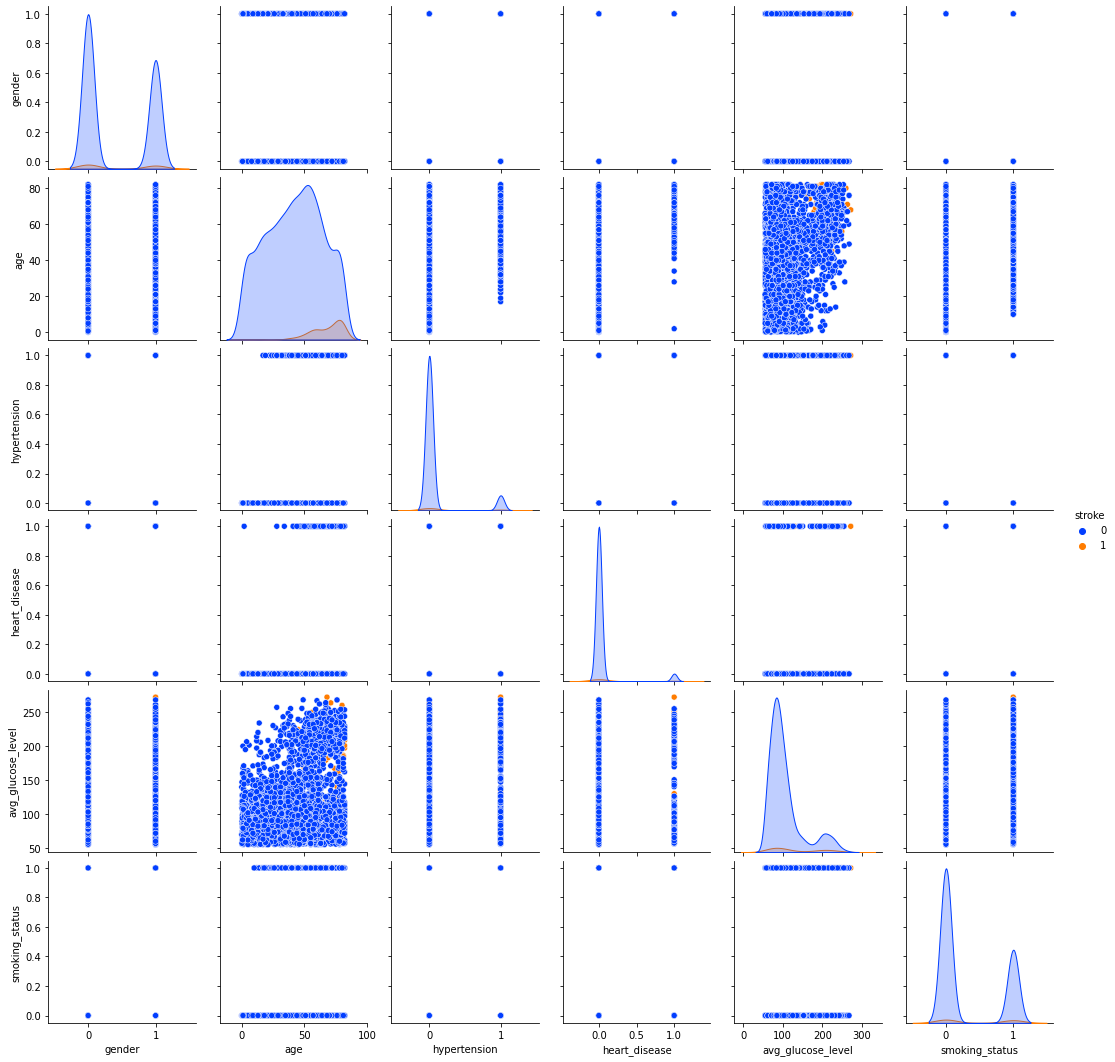

In [202]:
seaborn.pairplot(data.iloc[:,:7], hue="stroke",palette="bright")

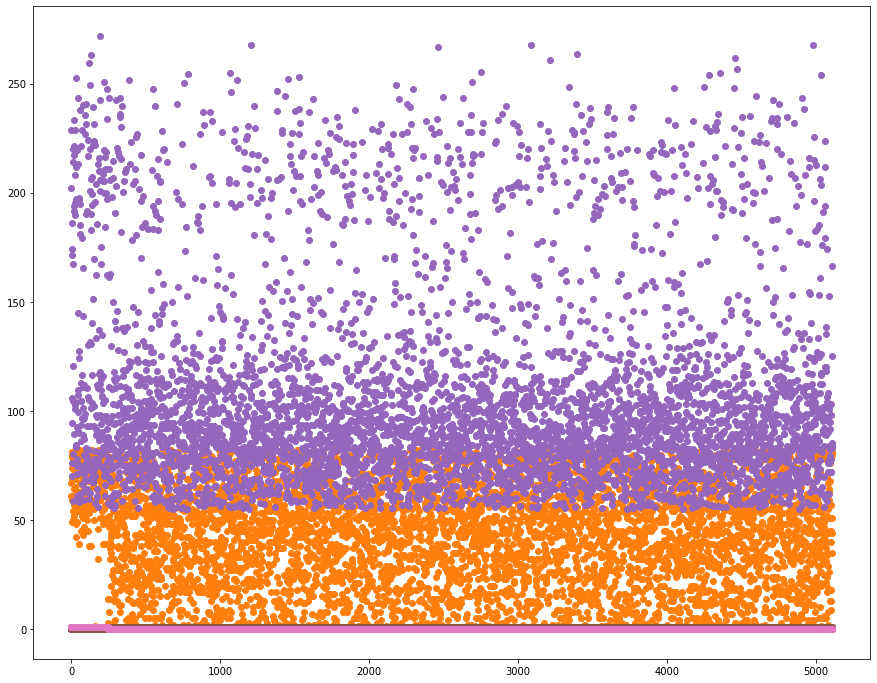

In [203]:
pyplot.scatter(x=[i for i in range(1,len(data)+1)],y=data.iloc[:,0])
pyplot.scatter(x=[i for i in range(1,len(data)+1)],y=data.iloc[:,1])
pyplot.scatter(x=[i for i in range(1,len(data)+1)],y=data.iloc[:,2])
pyplot.scatter(x=[i for i in range(1,len(data)+1)],y=data.iloc[:,3])
pyplot.scatter(x=[i for i in range(1,len(data)+1)],y=data.iloc[:,4])
pyplot.scatter(x=[i for i in range(1,len(data)+1)],y=data.iloc[:,5])
pyplot.scatter(x=[i for i in range(1,len(data)+1)],y=data.iloc[:,6])

# Data Preparation

### Suffling the data set 👇
this is to get splitted data, that have all type of the classes in training and testing

In [205]:
shuffled_Data=data.sample(frac=1)

## Splitting the dataset into training and testing 👇

For Training 85% data is being used and for testing 15% data is used from the given data


In [206]:
training_value=int(len(shuffled_Data)*0.85)

In [207]:
Training_Data = shuffled_Data[:training_value]
Testing_Data = shuffled_Data[training_value:]

In [208]:
Training_Data['stroke'].value_counts()

0    4133
1     210
Name: stroke, dtype: int64

In [209]:
Training_Data

,gender,age,hypertension,heart_disease,avg_glucose_level,smoking_status,stroke
546,1,9.0,0,0,122.22,0,0
4933,0,81.0,0,0,80.44,0,0
2112,1,13.0,0,0,74.19,1,0
2740,1,15.0,0,0,79.59,0,0
5017,0,58.0,0,0,69.12,0,0
...,...,...,...,...,...,...,...
3289,0,44.0,0,0,86.15,0,0
2281,0,47.0,0,0,131.43,0,0
1004,1,39.0,0,0,72.49,1,0
3568,1,39.0,1,0,88.18,1,0


## Dividing the training data features and labels 👇 
this will be used for training of model

In [210]:
training_Labels=Training_Data['stroke']
training_Features=Training_Data.drop(['stroke'],axis=1)

In [211]:
training_Features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4343 entries, 546 to 1346
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4343 non-null   int64  
 1   age                4343 non-null   float64
 2   hypertension       4343 non-null   int64  
 3   heart_disease      4343 non-null   int64  
 4   avg_glucose_level  4343 non-null   float64
 5   smoking_status     4343 non-null   int64  
dtypes: float64(2), int64(4)
memory usage: 237.5 KB


In [212]:
training_Labels.value_counts()

0    4133
1     210
Name: stroke, dtype: int64

## dividing the testing data features and labels 👇 
this will be used for testing the model

In [213]:
testing_Labels=Testing_Data['stroke']
testing_Features=Testing_Data.drop(['stroke'],axis=1)

In [214]:
testing_Features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 767 entries, 2081 to 2831
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             767 non-null    int64  
 1   age                767 non-null    float64
 2   hypertension       767 non-null    int64  
 3   heart_disease      767 non-null    int64  
 4   avg_glucose_level  767 non-null    float64
 5   smoking_status     767 non-null    int64  
dtypes: float64(2), int64(4)
memory usage: 41.9 KB


In [215]:
testing_Labels.value_counts()

0    728
1     39
Name: stroke, dtype: int64

# Bagging

# Creating the SVM instance and it is given to bagging classifier 👇
so for bagging will apply SVM model multiple time and output will be given by combination of all

In [216]:
svmmodel=svm.LinearSVC()
bagging_classifier = BaggingClassifier(base_estimator=svmmodel)

### fitting the model 👇

In [217]:
bagging_classifier.fit(training_Features,training_Labels)

C:\Users\Pankaj singh\AppData\Roaming\Python\Python39\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Pankaj singh\AppData\Roaming\Python\Python39\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Pankaj singh\AppData\Roaming\Python\Python39\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Pankaj singh\AppData\Roaming\Python\Python39\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Pankaj singh\AppData\Roaming\Python\Python3

BaggingClassifier(base_estimator=LinearSVC())

## ________________________________________________________________________

## Optional Part 👇
### checking model on training data to check training accuracy (not needed)

              precision    recall  f1-score   support

           0       0.95      1.00      0.98      4133
           1       0.00      0.00      0.00       210

    accuracy                           0.95      4343
   macro avg       0.48      0.50      0.49      4343
weighted avg       0.91      0.95      0.93      4343



C:\Users\Pankaj singh\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Pankaj singh\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Pankaj singh\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_

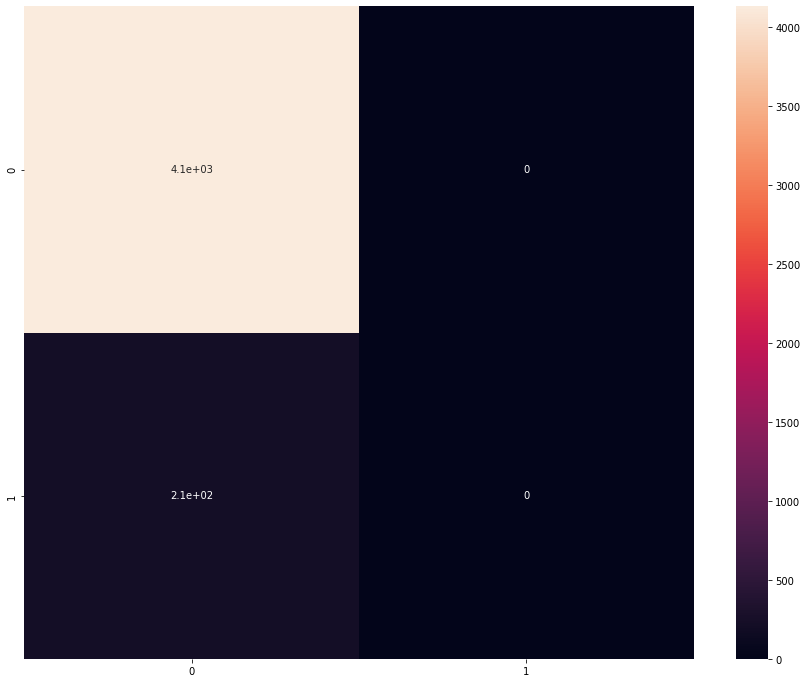

In [218]:
training_predicted_values=bagging_classifier.predict(training_Features)
training_classification_data=confusion_matrix(training_Labels,training_predicted_values)
seaborn.heatmap(training_classification_data,annot=True)
print(classification_report(training_Labels,training_predicted_values))

Training accuracy is 89%

# ________________________________________

# Now Testing the model 👇

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       728
           1       0.00      0.00      0.00        39

    accuracy                           0.95       767
   macro avg       0.47      0.50      0.49       767
weighted avg       0.90      0.95      0.92       767



C:\Users\Pankaj singh\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Pankaj singh\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Pankaj singh\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_

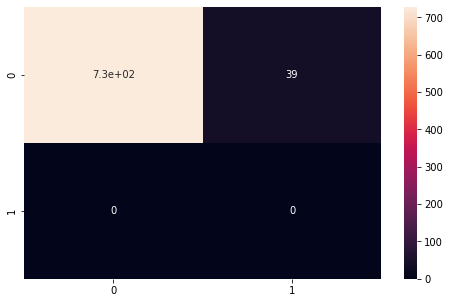

In [255]:
predicted_values=bagging_classifier.predict(testing_Features)
classification_data=confusion_matrix(predicted_values,testing_Labels)
seaborn.heatmap(classification_data,annot=True)
print(classification_report(testing_Labels,predicted_values))

### Following will show that what is actual value and what is predicted by model 👇

In [220]:
predicted_values=list(predicted_values)
testing_Labels=list(testing_Labels)
print("Actual Values --> Predicted values")
for i in range(len(predicted_values)):
    print("     ",testing_Labels[i]," --> ",predicted_values[i])

Actual Values --> Predicted values
      0  -->  0
      0  -->  0
      0  -->  0
      0  -->  0
      0  -->  0
      0  -->  0
      0  -->  0
      0  -->  0
      0  -->  0
      0  -->  0
      0  -->  0
      0  -->  0
      0  -->  0
      0  -->  0
      0  -->  0
      0  -->  0
      0  -->  0
      1  -->  0
      0  -->  0
      0  -->  0
      0  -->  0
      0  -->  0
      0  -->  0
      0  -->  0
      0  -->  0
      0  -->  0
      0  -->  0
      0  -->  0
      0  -->  0
      0  -->  0
      0  -->  0
      0  -->  0
      0  -->  0
      0  -->  0
      0  -->  0
      0  -->  0
      0  -->  0
      0  -->  0
      1  -->  0
      0  -->  0
      0  -->  0
      0  -->  0
      0  -->  0
      0  -->  0
      0  -->  0
      0  -->  0
      0  -->  0
      0  -->  0
      0  -->  0
      0  -->  0
      0  -->  0
      0  -->  0
      0  -->  0
      0  -->  0
      0  -->  0
      0  -->  0
      0  -->  0
      0  -->  0
      0  -->  0
      0  -->  0
     

      0  -->  0
      0  -->  0
      0  -->  0
      0  -->  0
      0  -->  0
      0  -->  0
      0  -->  0
      0  -->  0
      0  -->  0
      0  -->  0
      0  -->  0
      0  -->  0
      0  -->  0
      0  -->  0
      0  -->  0
      1  -->  0
      0  -->  0
      0  -->  0
      0  -->  0
      0  -->  0
      0  -->  0
      0  -->  0
      0  -->  0
      0  -->  0
      0  -->  0
      0  -->  0
      0  -->  0
      1  -->  0
      0  -->  0
      0  -->  0
      0  -->  0
      0  -->  0
      0  -->  0
      0  -->  0
      0  -->  0
      0  -->  0
      0  -->  0
      0  -->  0
      0  -->  0
      0  -->  0
      0  -->  0
      1  -->  0
      0  -->  0
      0  -->  0
      0  -->  0
      0  -->  0
      0  -->  0
      0  -->  0
      0  -->  0
      0  -->  0
      1  -->  0
      0  -->  0
      0  -->  0
      0  -->  0
      0  -->  0
      1  -->  0
      0  -->  0
      0  -->  0
      0  -->  0
      0  -->  0
      0  -->  0
      0  -->  0
      0 

# Boosting

In [221]:
XGBoost_classifier = xgboost.XGBClassifier()

In [222]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
training_Labels = le.fit_transform(training_Labels)
testing_Labels=le.transform(testing_Labels)

In [223]:
XGBoost_classifier.fit(training_Features,training_Labels)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      4133
           1       1.00      0.60      0.75       210

    accuracy                           0.98      4343
   macro avg       0.99      0.80      0.87      4343
weighted avg       0.98      0.98      0.98      4343



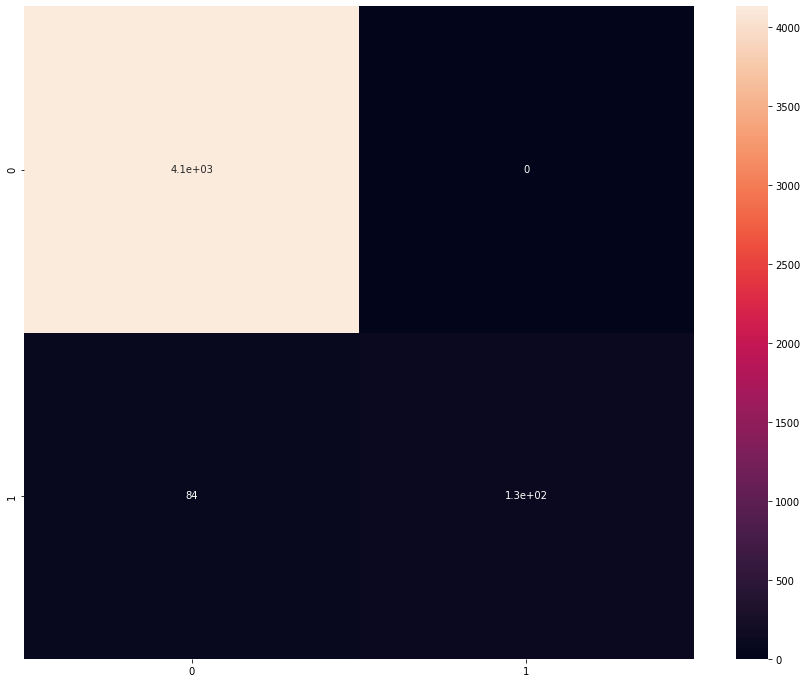

In [224]:
training_predicted_values=XGBoost_classifier.predict(training_Features)
training_classification_data=confusion_matrix(training_Labels,training_predicted_values)
seaborn.heatmap(training_classification_data,annot=True)
print(classification_report(training_Labels,training_predicted_values))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       728
           1       0.09      0.03      0.04        39

    accuracy                           0.94       767
   macro avg       0.52      0.51      0.50       767
weighted avg       0.91      0.94      0.92       767



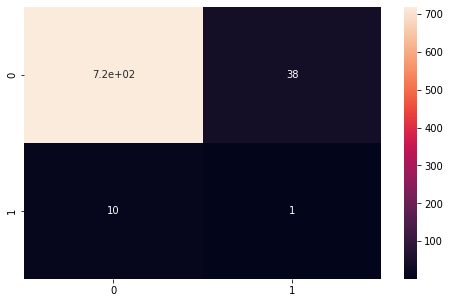

In [258]:
predicted_values=XGBoost_classifier.predict(testing_Features)
classification_data=confusion_matrix(predicted_values,testing_Labels)
seaborn.heatmap(classification_data,annot=True)
print(classification_report(testing_Labels,predicted_values))

# RandomForestRegressor (Bagging)

In [226]:
randomForestClassifier=RandomForestClassifier()

In [227]:
randomForestClassifier.fit(training_Features,training_Labels)

RandomForestClassifier()

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4133
           1       1.00      1.00      1.00       210

    accuracy                           1.00      4343
   macro avg       1.00      1.00      1.00      4343
weighted avg       1.00      1.00      1.00      4343



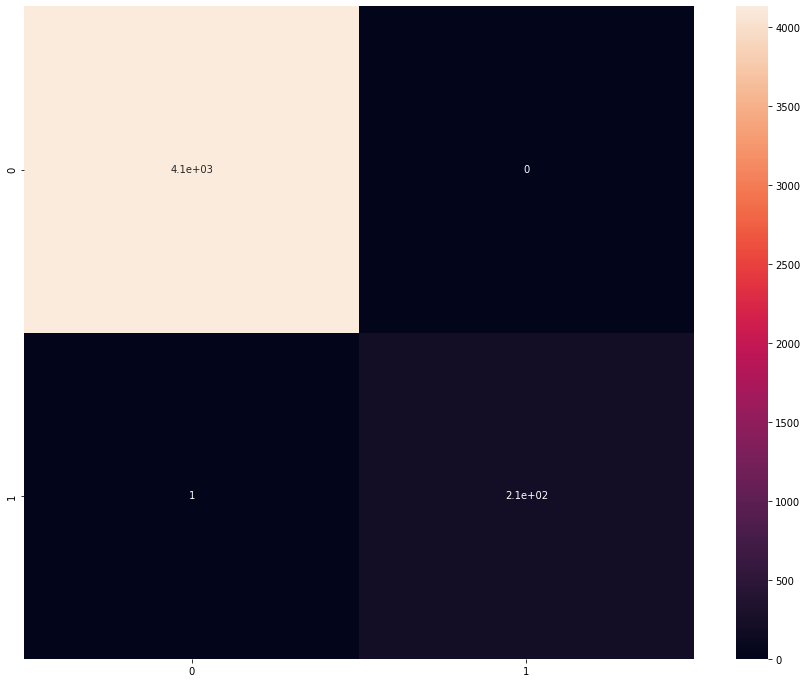

In [228]:
training_predicted_values=randomForestClassifier.predict(training_Features)
training_classification_data=confusion_matrix(training_Labels,training_predicted_values)
seaborn.heatmap(training_classification_data,annot=True)
print(classification_report(training_Labels,training_predicted_values))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       728
           1       0.00      0.00      0.00        39

    accuracy                           0.94       767
   macro avg       0.47      0.49      0.48       767
weighted avg       0.90      0.94      0.92       767



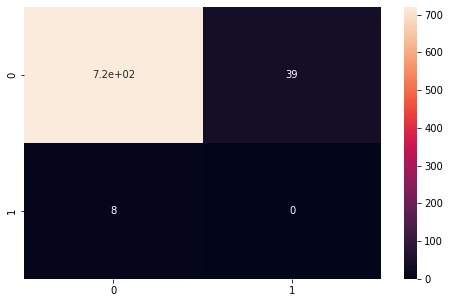

In [257]:
predicted_values=randomForestClassifier.predict(testing_Features)
classification_data=confusion_matrix(predicted_values,testing_Labels)
seaborn.heatmap(classification_data,annot=True)
print(classification_report(testing_Labels,predicted_values))

# GradientBoostingClassifier

In [230]:
gradientBoostingClassifier=GradientBoostingClassifier()

In [231]:
gradientBoostingClassifier.fit(training_Features,training_Labels)

GradientBoostingClassifier()

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      4133
           1       1.00      0.13      0.24       210

    accuracy                           0.96      4343
   macro avg       0.98      0.57      0.61      4343
weighted avg       0.96      0.96      0.94      4343



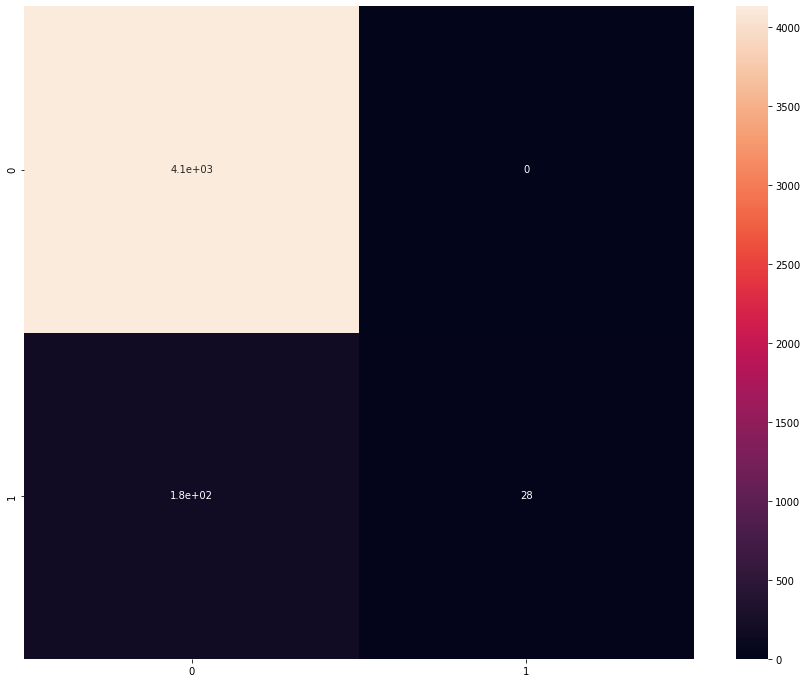

In [232]:
training_predicted_values=gradientBoostingClassifier.predict(training_Features)
training_classification_data=confusion_matrix(training_Labels,training_predicted_values)
seaborn.heatmap(training_classification_data,annot=True)
print(classification_report(training_Labels,training_predicted_values))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       728
           1       0.00      0.00      0.00        39

    accuracy                           0.95       767
   macro avg       0.47      0.50      0.49       767
weighted avg       0.90      0.95      0.92       767



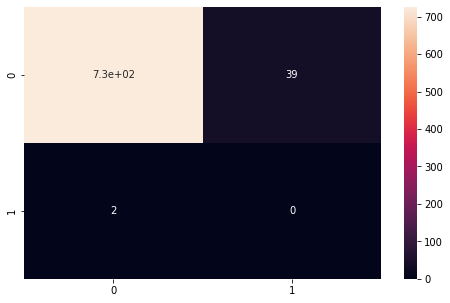

In [256]:
predicted_values=gradientBoostingClassifier.predict(testing_Features)
classification_data=confusion_matrix(predicted_values,testing_Labels)
seaborn.heatmap(classification_data,annot=True)
print(classification_report(testing_Labels,predicted_values))

## Testing on new Data 👇
for,


2) gender: "Male" <br/>
3) age: 21  <br/>
4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension  <br/>
5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease    <br/>
9) avg_glucose_level:  150   <br/>
11) smoking_status: "never smoked"  <br/>


##### (Correct Output Should be Not Failed)

In [246]:
new_data=[1,21,0,0,150,0]

In [251]:
print(classes_list[bagging_classifier.predict([new_data])[0]])

Not_Failed


In [252]:
print(classes_list[randomForestClassifier.predict([new_data])[0]])

Not_Failed


In [253]:
print(classes_list[gradientBoostingClassifier.predict([new_data])[0]])

Not_Failed
